## Análisis Exploratorio (EDA) de ingresos por día

Objetivo: Realizar análisis exploratiorio de datos para entender el conportamientos de los ingresos por día deteccion de patrones y outlier

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import json

# Configuración visual para los gráficos
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

print("Librerías cargadas correctamente.")

Librerías cargadas correctamente.


In [17]:
# 1. Cargar el dataset
# Asegúrate de que el archivo esté en la misma carpeta o coloca la ruta completa
nombre_archivo = '../data/ingresos_membresia_diaria.csv'  # <--- CAMBIA ESTO POR TU ARCHIVO REAL
df_main = pd.read_csv(nombre_archivo)

# 2. Conversión de fechas
df_main['fecha'] = pd.to_datetime(df_main['fecha'])

# 3. Verificación rápida
print(f"Rango de fechas: {df_main['fecha'].min()} a {df_main['fecha'].max()}")
print(f"Tipos de suscripción encontrados: {df_main['tipo_suscripcion'].unique()}")
display(df_main.head())

Rango de fechas: 2022-07-25 00:00:00 a 2025-12-03 00:00:00
Tipos de suscripción encontrados: ['1 Día (I.V.A incluido)' '3 Días (I.V.A incluido)'
 '7 Días (I.V.A incluido)' 'Anual (I.V.A incluido)'
 'Membresía Plus TEST 01 (IVA incluido)' 'Anual Ecobici+ (I.V.A incluido)'
 'Ecobici HSBC' 'ECOBICI vivo']


,anio,mes_numero,dia_numero,dia_semana,tipo_suscripcion,id_suscripcion,cantidad_Vendida,ingresos_totales_reales,fecha
0,2022,7,25,Monday,1 Día (I.V.A incluido),1,1,136.88,2022-07-25
1,2022,7,27,Wednesday,3 Días (I.V.A incluido),2,1,234.00,2022-07-27
2,2022,7,27,Wednesday,7 Días (I.V.A incluido),3,1,391.00,2022-07-27
3,2022,7,28,Thursday,1 Día (I.V.A incluido),1,3,354.00,2022-07-28
4,2022,7,28,Thursday,Anual (I.V.A incluido),4,1,521.00,2022-07-28


#### Estadistica descriptiva

In [18]:
df_main.describe()


,anio,mes_numero,dia_numero,id_suscripcion,cantidad_Vendida,ingresos_totales_reales,fecha
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760
mean,2023.894444,6.834201,15.811979,3.586458,162.463021,58479.577026,2024-06-02 13:24:15
min,2022.000000,1.000000,1.000000,1.000000,1.000000,118.000000,2022-07-25 00:00:00
25%,2023.000000,4.000000,8.000000,2.000000,11.000000,5463.890000,2023-08-04 00:00:00
50%,2024.000000,7.000000,16.000000,3.000000,39.000000,11339.000000,2024-07-11 12:00:00
75%,2025.000000,10.000000,23.000000,4.000000,242.250000,46576.282500,2025-04-08 00:00:00
max,2025.000000,12.000000,31.000000,11.000000,2567.000000,485895.090000,2025-12-03 00:00:00
std,0.995896,3.378549,8.808150,2.718709,235.535590,94892.676160,NaN


**Resumen Estadístico del Conjunto de Datos**

*   **Volumen y Período:** Se analizan **5,760 registros** que cubren el período del **25 de julio de 2022 al 3 de diciembre de 2025**.

*   **Cantidad Vendida al Día:**
    *   **Promedio:** 162 unidades.
    *   **Mediana:** 39 unidades (el 50% de las ventas son menores a este valor).
    *   **Máximo:** 2,567 unidades en una única transacción.

*   **Ingresos Totales al Día:**
    *   **Promedio:** $58,480.
    *   **Mediana:** $11,339.
    *   **Máximo:** $485,895 en un solo registro.

*   **Conclusión:** Los datos presentan una marcada asimetría. La mayoría de las ventas son de bajo volumen y generan ingresos modestos, mientras que unas pocas transacciones de gran magnitud elevan considerablemente los promedios.

#### Visualización historica

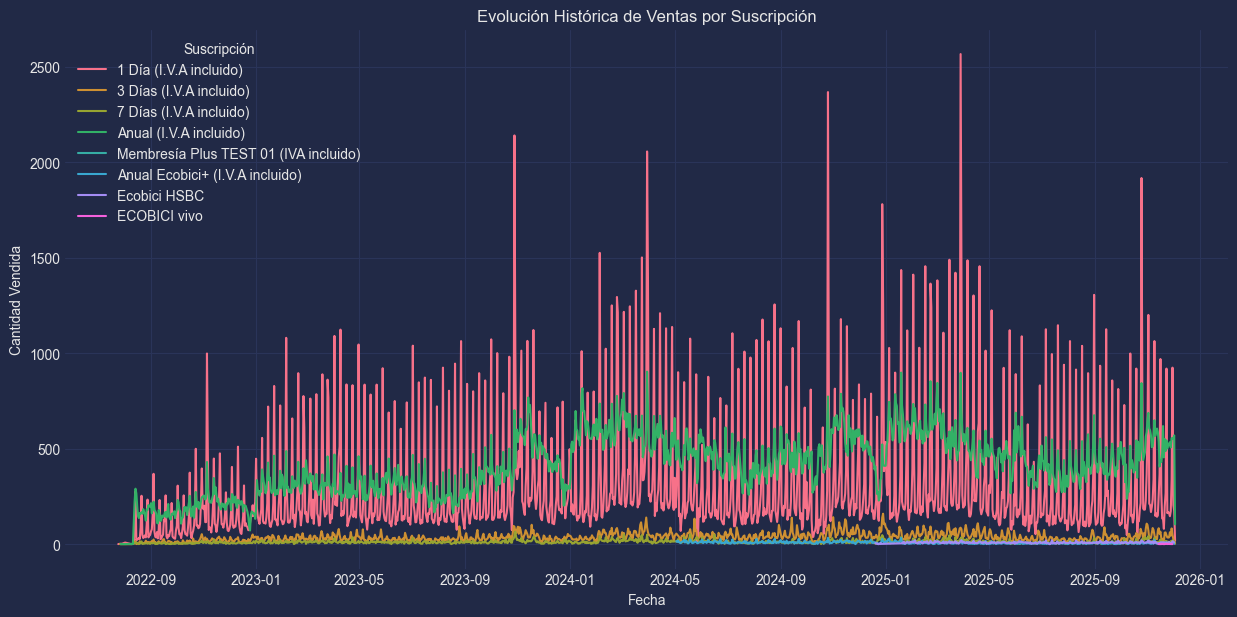

In [19]:
# Agrupamos por fecha y tipo para graficar
df_plot = df_main.groupby(['fecha', 'tipo_suscripcion'])['cantidad_Vendida'].sum().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(data=df_plot, x='fecha', y='cantidad_Vendida', hue='tipo_suscripcion')
plt.title('Evolución Histórica de Ventas por Suscripción')
plt.ylabel('Cantidad Vendida')
plt.xlabel('Fecha')
plt.legend(title='Suscripción')
plt.show()

- La membresía 1 Día reprenta el mayor volumen de ventas al día
- La membresía Anual representa el segundo mayor volumen de ventas al día

#### Análisis por número de ventas

     año                       tipo_suscripcion  cantidad_Vendida
0   2022                 1 Día (I.V.A incluido)             18491
1   2022                3 Días (I.V.A incluido)              2374
2   2022                7 Días (I.V.A incluido)               886
3   2022                 Anual (I.V.A incluido)             27498
4   2023                 1 Día (I.V.A incluido)            105912
5   2023                3 Días (I.V.A incluido)             12035
6   2023                7 Días (I.V.A incluido)              4396
7   2023                 Anual (I.V.A incluido)            124757
8   2023  Membresía Plus TEST 01 (IVA incluido)                 1
9   2024                 1 Día (I.V.A incluido)            125140
10  2024                3 Días (I.V.A incluido)             17833
11  2024                7 Días (I.V.A incluido)              5364
12  2024                 Anual (I.V.A incluido)            185631
13  2024        Anual Ecobici+ (I.V.A incluido)              2691
14  2024  

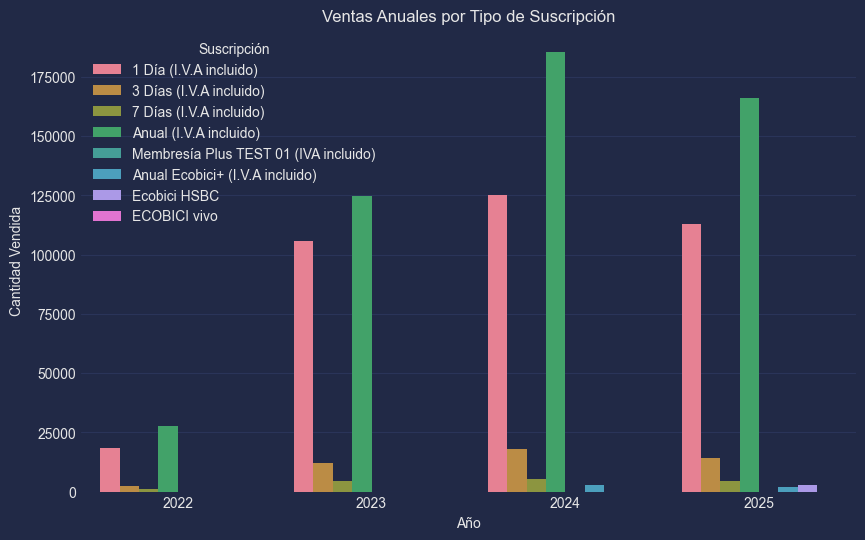

In [20]:
# Qué año vende más cada tipo de suscripción
df_main['año'] = df_main['fecha'].dt.year
ventas_anuales = df_main.groupby(['año', 'tipo_suscripcion'])['cantidad_Vendida'].sum().reset_index()
print(ventas_anuales)

# grafico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_anuales, x='año', y='cantidad_Vendida', hue='tipo_suscripcion')
plt.title('Ventas Anuales por Tipo de Suscripción')
plt.ylabel('Cantidad Vendida')
plt.xlabel('Año')
plt.legend(title='Suscripción')
plt.show()

Análisis de Ventas Anuales por Tipo de Suscripción

- **Liderazgo de la Membresía Anual:** La suscripción "Anual" domina las ventas, mostrando un crecimiento sostenido y alcanzando su punto máximo en 2024 con más de 180,000 unidades vendidas.
- **Fuerte Desempeño de la Membresía de 1 Día:** La membresía de "1 Día" se consolida como la segunda opción más popular, con un crecimiento notable que también alcanza su pico en 2024, superando las 125,000 unidades.
- **Tendencia General de Crecimiento:** Se observa una clara tendencia de crecimiento en las ventas totales desde 2022 hasta 2024, seguida de una ligera moderación en 2025 para las dos suscripciones principales.
- **Bajo Impacto de Otras Membresías:** Las suscripciones de 3 y 7 días, junto con otras como "Ecobici HSBC", tienen un volumen de ventas marginal y no representan una parte significativa del negocio.

    mes_numero                 tipo_suscripcion  cantidad_Vendida
0            1           1 Día (I.V.A incluido)             25422
1            1          3 Días (I.V.A incluido)              3255
2            1          7 Días (I.V.A incluido)              1023
3            1           Anual (I.V.A incluido)             47478
4            1  Anual Ecobici+ (I.V.A incluido)               374
..         ...                              ...               ...
69          12          3 Días (I.V.A incluido)              3445
70          12          7 Días (I.V.A incluido)              1107
71          12           Anual (I.V.A incluido)             32794
72          12  Anual Ecobici+ (I.V.A incluido)               356
73          12                     Ecobici HSBC                50

[74 rows x 3 columns]


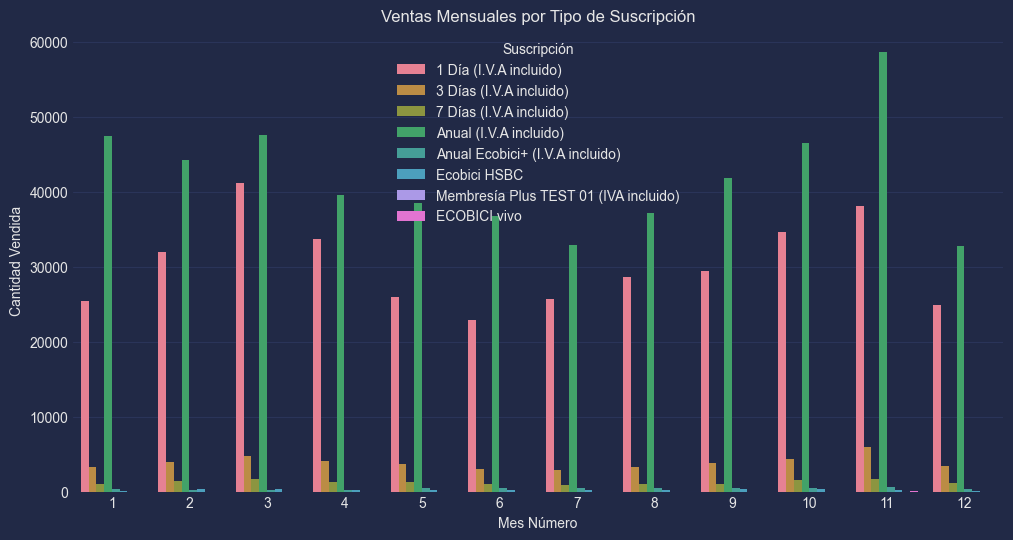

In [21]:
# Qué año vende más cada tipo de suscripción
df_main['mes_numero'] = df_main['fecha'].dt.month
ventas_mensuales = df_main.groupby(['mes_numero', 'tipo_suscripcion'])['cantidad_Vendida'].sum().reset_index()
print(ventas_mensuales)

# grafico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_mensuales, x='mes_numero', y='cantidad_Vendida', hue='tipo_suscripcion')
plt.title('Ventas Mensuales por Tipo de Suscripción')
plt.ylabel('Cantidad Vendida')
plt.xlabel('Mes Número')
plt.legend(title='Suscripción')
plt.show()

Analisis de ventas mensuales por tipo de suscripcion

- El mayor número de ventas lo representa la membresia Anual donde Noviembre es el mayor mes que se vende(posible renovación en este mes)
- La segunda mayor membresia vendida durante el año es la membresia de 1 Día donde repunta en el mes de marzo

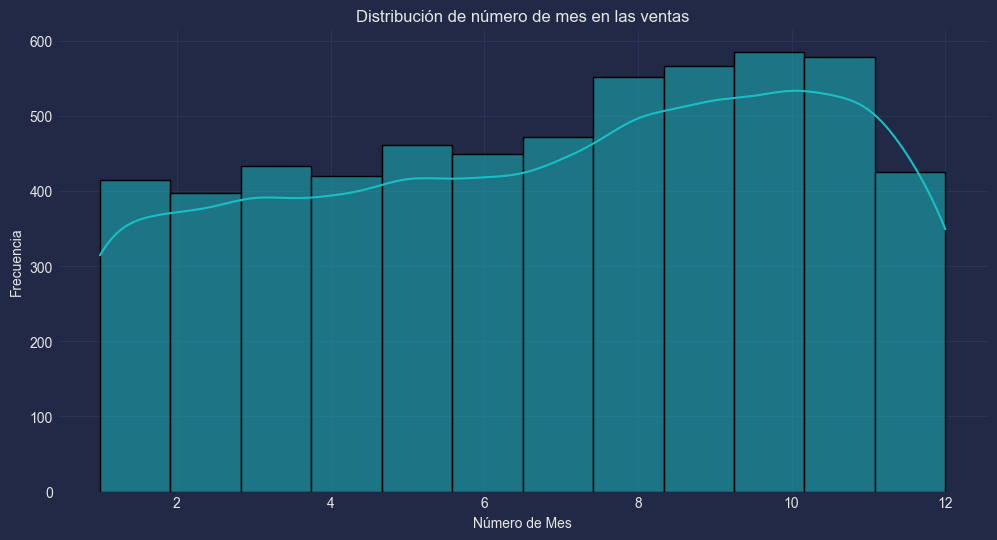

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(df_main['mes_numero'], kde=True, bins=12)
plt.title('Distribución de número de mes en las ventas')
plt.xlabel('Número de Mes')
plt.ylabel('Frecuencia')
plt.show()

Análisis de distribución mensual

- **Tendencia Creciente:** Se evidencia un aumento progresivo en la frecuencia de ventas a lo largo del año, siendo el primer cuatrimestre el de menor actividad.
- **Pico de Temporada:** Los meses de octubre y noviembre (10 y 11) registran los niveles más altos de ventas, marcando el punto máximo de la temporada.
- **Cierre de Año:** A pesar de la tendencia positiva, el mes de diciembre muestra una leve desaceleración en comparación con el pico de noviembre, aunque se mantiene por encima del promedio anual.

     dia_numero                 tipo_suscripcion  cantidad_Vendida
0             1           1 Día (I.V.A incluido)             13030
1             1          3 Días (I.V.A incluido)              1749
2             1          7 Días (I.V.A incluido)               508
3             1           Anual (I.V.A incluido)             18428
4             1  Anual Ecobici+ (I.V.A incluido)               168
..          ...                              ...               ...
191          31          3 Días (I.V.A incluido)              1085
192          31          7 Días (I.V.A incluido)               318
193          31           Anual (I.V.A incluido)             10028
194          31  Anual Ecobici+ (I.V.A incluido)                80
195          31                     Ecobici HSBC                49

[196 rows x 3 columns]


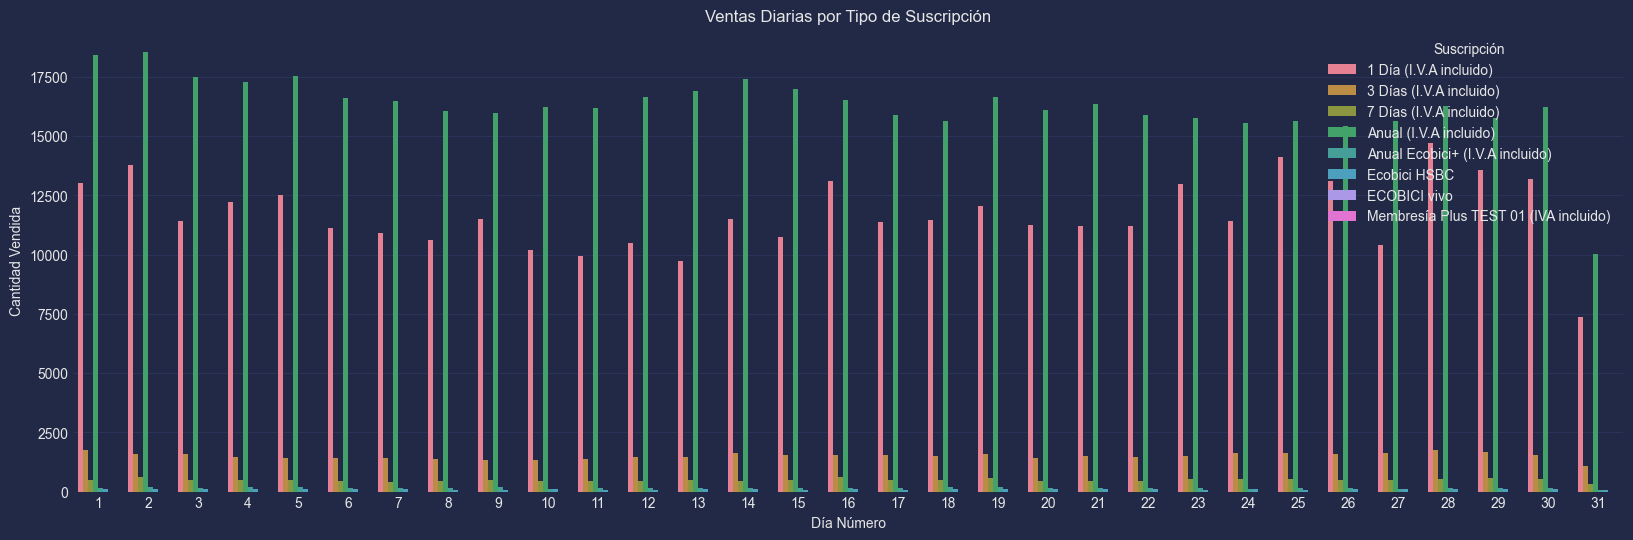

In [23]:
# Qué día vende más cada tipo de suscripción
df_main['dia_numero'] = df_main['fecha'].dt.day
ventas_diarias = df_main.groupby(['dia_numero', 'tipo_suscripcion'])['cantidad_Vendida'].sum().reset_index()
print(ventas_diarias)

# grafico de area
plt.figure(figsize=(20, 6))
sns.barplot(data=ventas_diarias, x='dia_numero', y='cantidad_Vendida', hue='tipo_suscripcion')
plt.title('Ventas Diarias por Tipo de Suscripción')
plt.ylabel('Cantidad Vendida')
plt.xlabel('Día Número')
plt.legend(title='Suscripción')
plt.show()

Análisis de ventas diarias

- **Dominio de la Membresía Anual:** Se observa que la suscripción "Anual" mantiene el liderazgo en ventas de manera consistente durante todos los días del mes.
- **Estabilidad en Membresía de 1 Día:** La suscripción de "1 Día" se posiciona firmemente como la segunda opción más vendida, mostrando un comportamiento estable sin fluctuaciones drásticas entre los días.
- **Distribución Uniforme:** No se aprecian picos o caídas significativas en días específicos (como inicio o fin de mes), lo que sugiere una demanda constante diaria para las principales suscripciones.

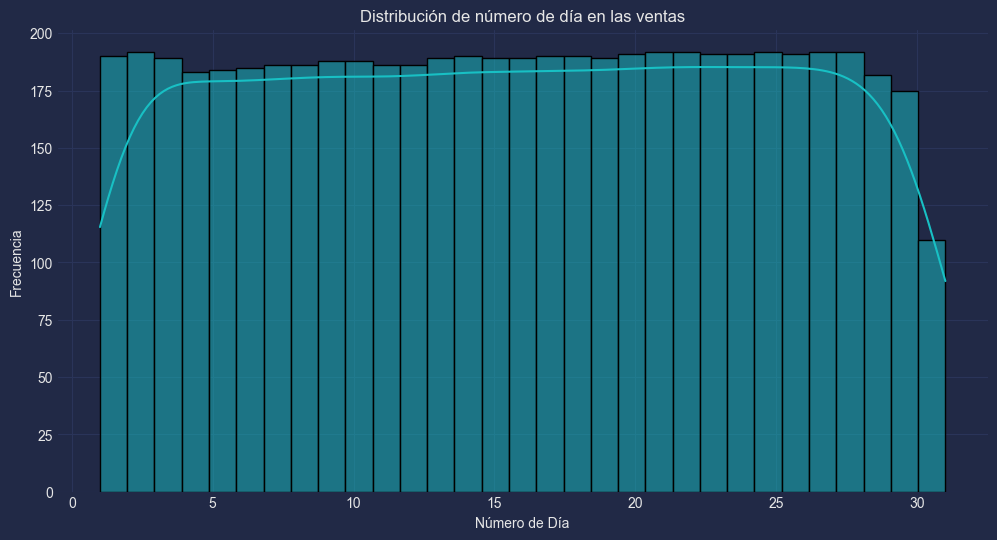

In [24]:
# histplot de dia_numero mostrar todos los dias del mes
plt.figure(figsize=(12, 6))
sns.histplot(df_main['dia_numero'], kde=True, bins=31)
plt.title('Distribución de número de día en las ventas')
plt.xlabel('Número de Día')
plt.ylabel('Frecuencia')
plt.show()

Análisis de distribución de ventas por día del mes

- **Estabilidad General:** Se observa una frecuencia de ventas constante y sostenida durante la gran mayoría del mes (aproximadamente del día 3 al 28).
- **Caída en Cierre de Mes:** Existe una disminución notable en los registros durante los días 29, 30 y 31, explicable parcialmente por la variabilidad en la duración de los meses.
- **Inicio Progresivo:** El primer día del mes presenta un volumen ligeramente inferior al promedio, recuperándose rápidamente en los días subsiguientes.

#### Análisis por monto de venta

     año                       tipo_suscripcion  ingresos_totales_reales
0   2022                 1 Día (I.V.A incluido)               2175811.51
1   2022                3 Días (I.V.A incluido)                554743.58
2   2022                7 Días (I.V.A incluido)                346132.75
3   2022                 Anual (I.V.A incluido)              14218923.60
4   2023                 1 Día (I.V.A incluido)              12432620.30
5   2023                3 Días (I.V.A incluido)               2809870.20
6   2023                7 Días (I.V.A incluido)               1716196.75
7   2023                 Anual (I.V.A incluido)              64265907.79
8   2023  Membresía Plus TEST 01 (IVA incluido)                  8352.00
9   2024                 1 Día (I.V.A incluido)              15125668.34
10  2024                3 Días (I.V.A incluido)               4308026.67
11  2024                7 Días (I.V.A incluido)               2161984.05
12  2024                 Anual (I.V.A incluido)    

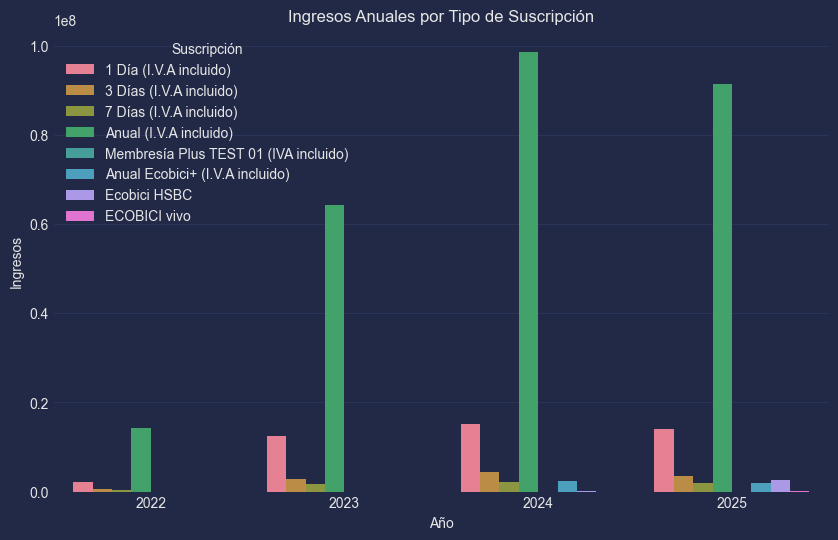

In [25]:
# Qué año vende más cada tipo de suscripción
df_main['año'] = df_main['fecha'].dt.year
ventas_anuales = df_main.groupby(['año', 'tipo_suscripcion'])['ingresos_totales_reales'].sum().reset_index()
print(ventas_anuales)

# grafico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_anuales, x='año', y='ingresos_totales_reales', hue='tipo_suscripcion')
plt.title('Ingresos Anuales por Tipo de Suscripción')
plt.ylabel('Ingresos')
plt.xlabel('Año')
plt.legend(title='Suscripción')
plt.show()

**Análisis de Ingresos Anuales por Tipo de Suscripción**

*   **Dominio Absoluto de la Suscripción Anual:** La suscripción "Anual" es la principal fuente de ingresos, superando los 60 millones en 2023 y rozando los 100 millones en 2024, lo que demuestra su papel central en la facturación de la empresa.
*   **Relevancia de la Suscripción de 1 Día:** Aunque a una escala menor, la suscripción de "1 Día" se posiciona como la segunda fuente de ingresos más importante, mostrando un crecimiento constante y superando los 15 millones en 2024.
*   **Impacto Marginal de Otras Suscripciones:** Las demás opciones, como las suscripciones de 3 y 7 días, generan ingresos considerablemente bajos en comparación, indicando que no son un motor financiero clave para el negocio.

    mes_numero                 tipo_suscripcion  ingresos_totales_reales
0            1           1 Día (I.V.A incluido)               3038348.40
1            1          3 Días (I.V.A incluido)                776341.70
2            1          7 Días (I.V.A incluido)                406687.20
3            1           Anual (I.V.A incluido)              24949271.92
4            1  Anual Ecobici+ (I.V.A incluido)                334742.65
..         ...                              ...                      ...
69          12          3 Días (I.V.A incluido)                824555.90
70          12          7 Días (I.V.A incluido)                442629.70
71          12           Anual (I.V.A incluido)              17242503.29
72          12  Anual Ecobici+ (I.V.A incluido)                320109.06
73          12                     Ecobici HSBC                 46880.56

[74 rows x 3 columns]


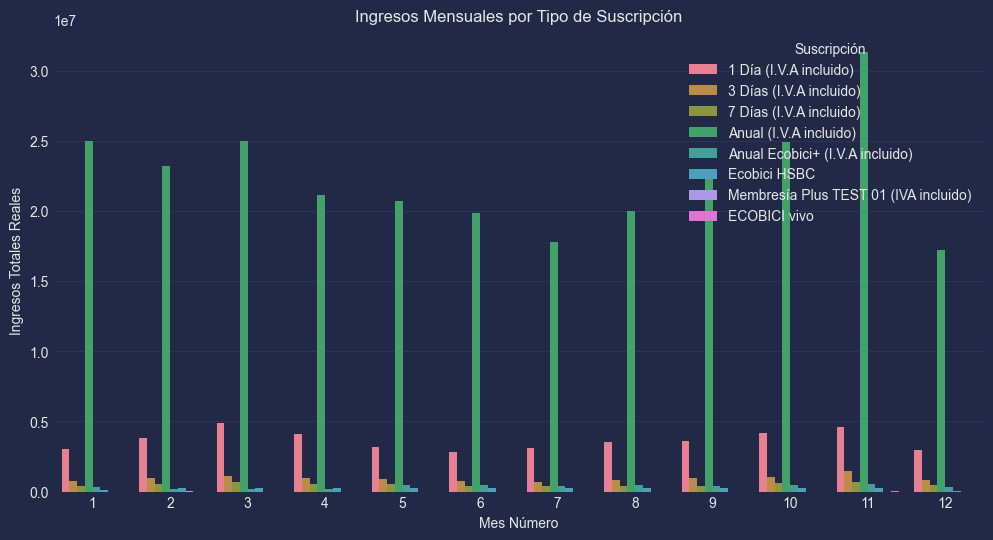

In [26]:
# Qué año vende más cada tipo de suscripción
df_main['mes_numero'] = df_main['fecha'].dt.month
ventas_mensuales = df_main.groupby(['mes_numero', 'tipo_suscripcion'])['ingresos_totales_reales'].sum().reset_index()
print(ventas_mensuales)

# grafico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_mensuales, x='mes_numero', y='ingresos_totales_reales', hue='tipo_suscripcion')
plt.title('Ingresos Mensuales por Tipo de Suscripción')
plt.ylabel('Ingresos Totales Reales')
plt.xlabel('Mes Número')
plt.legend(title='Suscripción')
plt.show()

**Análisis de Ingresos Mensuales por Tipo de Suscripción**

*   **Liderazgo Constante de la Suscripción Anual:** La suscripción "Anual" es la principal fuente de ingresos en todos los meses del año, con una facturación que consistentemente supera los 20 millones, destacando su importancia estratégica.
*   **Picos Estacionales en la Suscripción de 1 Día:** La suscripción de "1 Día" se consolida como la segunda fuente de ingresos, mostrando picos de demanda en meses como marzo, mayo y octubre. Esto sugiere una fuerte estacionalidad, posiblemente ligada a períodos vacacionales o eventos específicos.
*   **Contribución Menor de Otras Suscripciones:** Las demás membresías (3 Días, 7 Días, etc.) tienen un impacto mínimo en los ingresos mensuales, lo que refuerza la idea de que el negocio se sostiene principalmente sobre las suscripciones anuales y diarias.

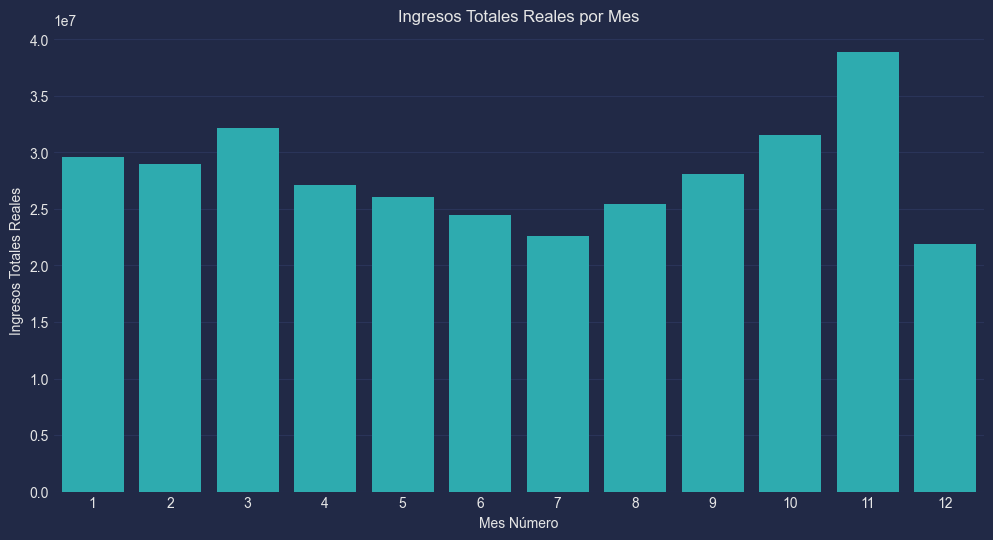

In [27]:
# agrupar ingresos_totales_reales por mes_numero
plt.figure(figsize=(12, 6))
ventas_mensuales = df_main.groupby('mes_numero')['ingresos_totales_reales'].sum().reset_index()
sns.barplot(data=ventas_mensuales, x='mes_numero', y='ingresos_totales_reales')
plt.title('Ingresos Totales Reales por Mes')
plt.xlabel('Mes Número')
plt.ylabel('Ingresos Totales Reales')
plt.show()

**Análisis de Ingresos Totales por Mes**

*   **Pico de Ingresos en Noviembre:** El mes de noviembre (11) se destaca como el período de mayor facturación del año, alcanzando un máximo cercano a los 40 millones. Esto sugiere que es un mes estratégicamente importante, posiblemente impulsado por renovaciones o campañas específicas.
*   **Caída a Mitad de Año:** Se observa un valle en los ingresos durante los meses de verano, especialmente en julio (7), que registra el punto más bajo del año. Este comportamiento estacional podría estar relacionado con períodos vacacionales.
*   **Recuperación en el Último Trimestre:** A partir de agosto (8), los ingresos muestran una tendencia de recuperación constante que culmina en el pico de noviembre. Sin embargo, diciembre (12) experimenta una caída notable, cerrando el año con ingresos más moderados.

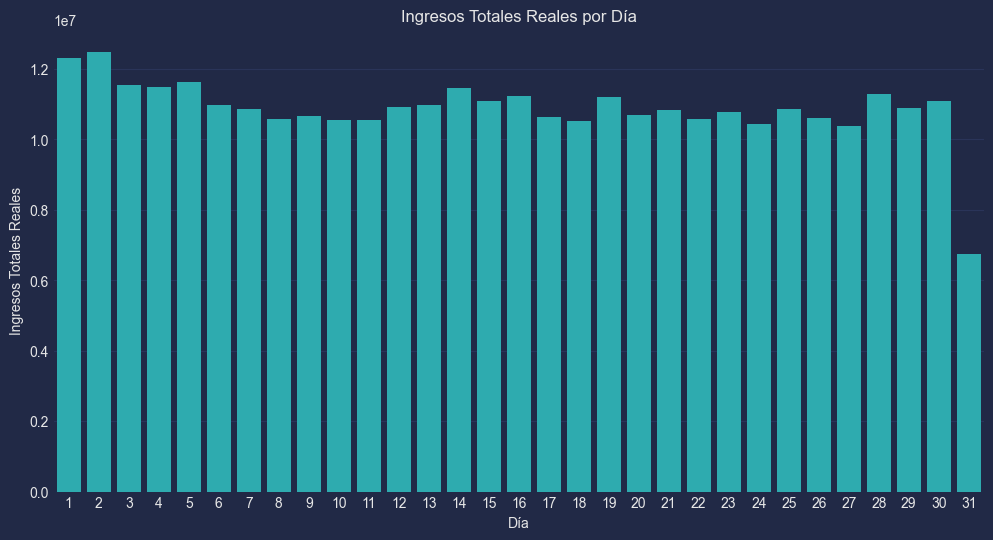

    dia_numero  ingresos_totales_reales
0            1              12312481.32
1            2              12493666.32
2            3              11538939.11
3            4              11484207.99
4            5              11643582.90
5            6              10973085.77
6            7              10854736.62
7            8              10565601.19
8            9              10654395.32
9           10              10552169.60
10          11              10562300.62
11          12              10910910.11
12          13              10976414.17
13          14              11459718.19
14          15              11094775.20
15          16              11232794.86
16          17              10628681.61
17          18              10518724.34
18          19              11209839.02
19          20              10695167.06
20          21              10845514.32
21          22              10572902.16
22          23              10769809.23
23          24              10442293.51


In [28]:
plt.figure(figsize=(12, 6))
ventas_mensuales = df_main.groupby('dia_numero')['ingresos_totales_reales'].sum().reset_index()
sns.barplot(data=ventas_mensuales, x='dia_numero', y='ingresos_totales_reales')
plt.title('Ingresos Totales Reales por Día')
plt.xlabel('Día')
plt.ylabel('Ingresos Totales Reales')
plt.show()

print(ventas_mensuales)

**Análisis de Ingresos Totales por Día**

*   **Inicio de Mes Fuerte:** Los ingresos más altos se concentran consistentemente en los primeros dos días del mes, superando los 12 millones.
*   **Estabilidad General:** Durante la mayor parte del mes (aproximadamente del día 3 al 28), los ingresos se mantienen estables, con fluctuaciones menores pero sin caídas drásticas.
*   **Caída al Cierre de Mes:** Se observa una disminución notable en los ingresos a partir del día 29, siendo el día 31 el que registra la cifra más baja. Esto se debe en parte a que no todos los meses tienen 31 días.

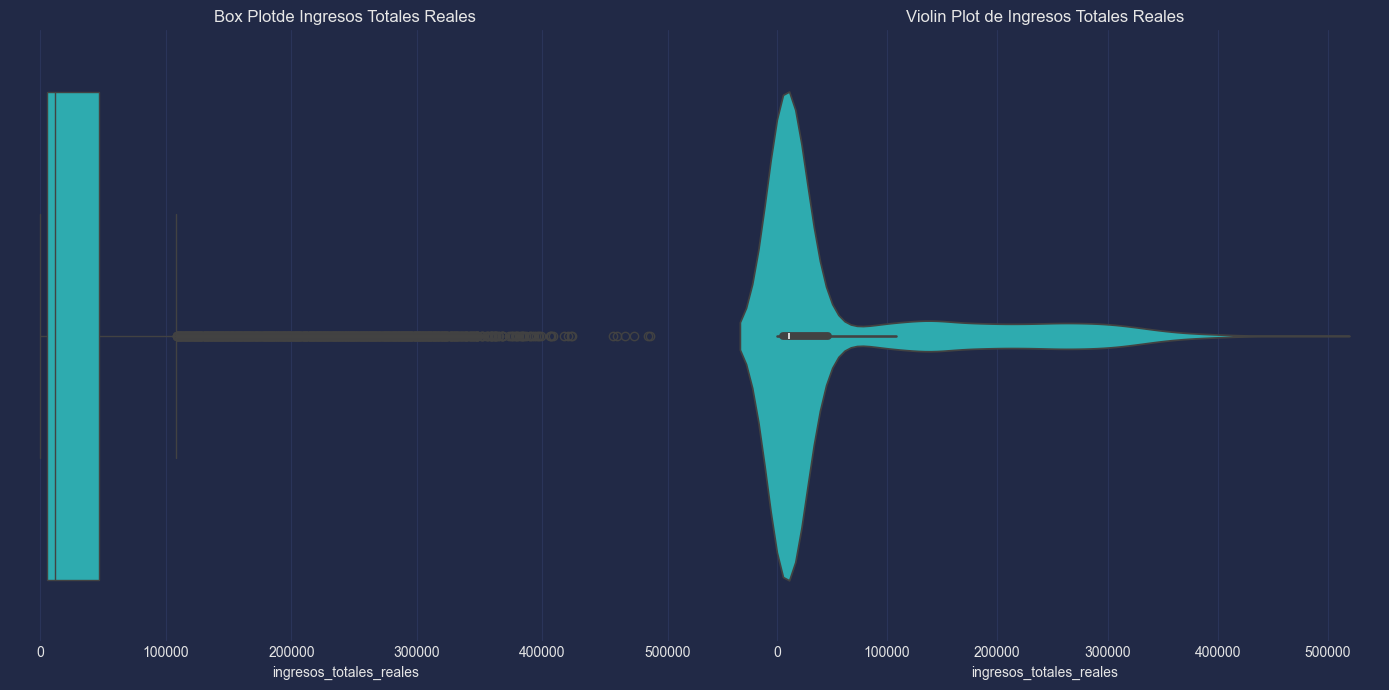

In [29]:
plt.figure(figsize=(14, 7))

# Gráfico de cajas
plt.subplot(1, 2, 1)
sns.boxplot(x=df_main['ingresos_totales_reales'])
plt.title('Box Plotde Ingresos Totales Reales')

# Diagrama de violín
plt.subplot(1, 2, 2)
sns.violinplot(x=df_main['ingresos_totales_reales'])
plt.title('Violin Plot de Ingresos Totales Reales')

plt.tight_layout()
plt.show()

**Análisis del Box Plot (Gráfico de Cajas)**

*   **Alta Concentración en Valores Bajos:** La caja del gráfico es muy estrecha y se encuentra cerca de cero, lo que indica que el 50% de los ingresos se concentra en un rango de valores muy bajo.
*   **Presencia de Múltiples Outliers:** Se observa una gran cantidad de puntos atípicos (outliers) que se extienden hacia la derecha, representando ingresos inusualmente altos en comparación con la mayoría de los registros.
*   **Fuerte Asimetría Positiva:** La mediana está muy cerca del primer cuartil (la parte inferior de la caja), y el bigote superior es extremadamente largo, lo que confirma que la distribución de los ingresos está fuertemente sesgada hacia la derecha.

**Análisis del Violin Plot (Diagrama de Violín)**

*   **Densidad Máxima en Cero:** La parte más ancha del violín está en el extremo inferior, lo que demuestra que la gran mayoría de los registros de ingresos tienen valores cercanos a cero.
*   **Cola Larga y Delgada:** La forma del gráfico, con una "cola" muy larga y delgada hacia la derecha, ilustra visualmente la presencia de valores atípicos y la escasa frecuencia de ingresos elevados.
*   **Distribución No Normal:** La forma asimétrica del violín confirma que los datos no siguen una distribución normal; en cambio, la mayoría de los ingresos son modestos, con unos pocos casos de ingresos excepcionalmente altos.

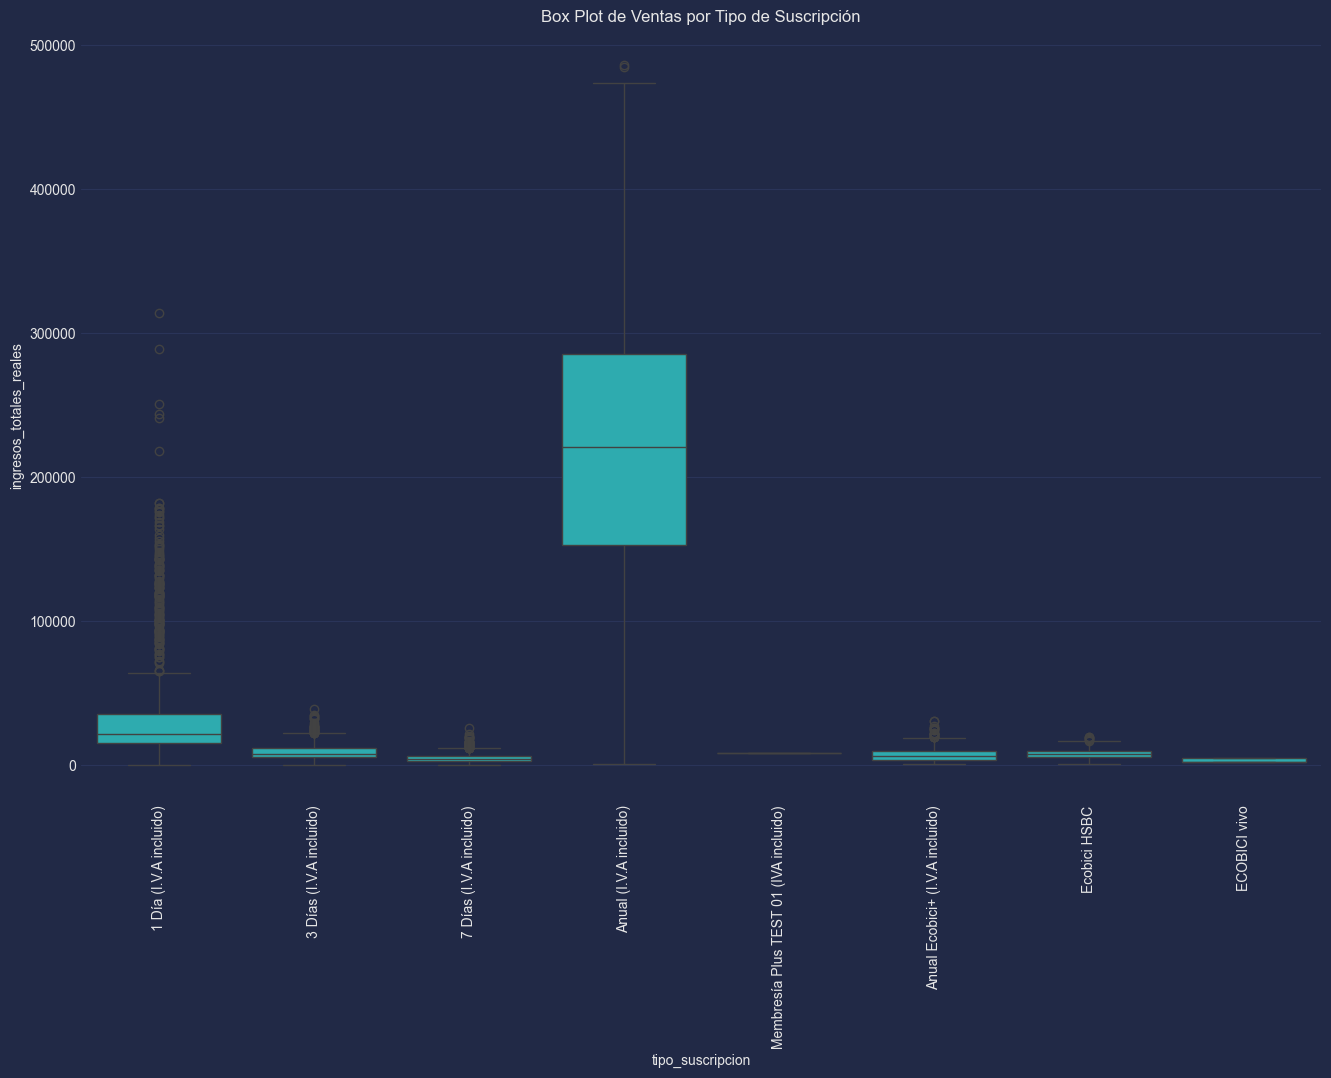

In [30]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='tipo_suscripcion', y='ingresos_totales_reales', data=df_main)
plt.title('Box Plot de Ventas por Tipo de Suscripción')
# leyendas x a 90 grados
plt.xticks(rotation=90)
plt.show()

**Suscripción de 1 Día:**

*   **Ingresos Generalmente Bajos:** La mayoría de las transacciones de esta suscripción generan ingresos modestos, como se observa en la caja compacta y cercana a cero.
*   **Numerosos Valores Atípicos:** A pesar de la tendencia general, existen muchos valores atípicos que indican ventas ocasionales de montos considerablemente altos, llegando hasta cerca de los 300,000.
*   **Fuerte Asimetría:** La distribución de los ingresos es muy asimétrica, con la mediana situada en la parte baja del rango, lo que confirma que las ventas de alto valor son la excepción y no la norma.

**Suscripción Anual:**

*   **Principal Fuente de Ingresos:** Esta suscripción destaca por tener el rango de ingresos más alto y amplio, con una mediana cercana a los 220,000, consolidándose como el producto más lucrativo.
*   **Alta Variabilidad:** La caja es ancha y los bigotes son largos, lo que indica una gran dispersión en los montos de ingresos, incluyendo el valor atípico más alto de todo el conjunto de datos (cercano a 500,000).
*   **Ingresos Consistentemente Altos:** A diferencia de otras suscripciones, el 50% central de sus ventas (la caja) se encuentra en un rango de ingresos elevado, lo que demuestra su importancia estratégica.

**Suscripciones de 3 y 7 Días:**

*   **Ingresos Bajos y Estables:** Ambas suscripciones presentan ingresos consistentemente bajos, con cajas muy estrechas y pegadas a cero.
*   **Outliers de Bajo Impacto:** Aunque tienen algunos valores atípicos, estos son de montos relativamente bajos y no alteran la tendencia general de ingresos modestos.
*   **Comportamiento Similar:** Los dos tipos de suscripción muestran un patrón casi idéntico, caracterizado por una baja rentabilidad y poca variabilidad.

**Otras Suscripciones (Test, HSBC, etc.):**

*   **Ingresos Insignificantes:** Estas categorías tienen un impacto prácticamente nulo en los ingresos totales, con la mayoría de sus registros en o muy cerca de cero.
*   **Falta de Variabilidad:** Sus gráficos son casi una línea plana, lo que indica que no generan ventas de montos variables o significativos.
*   **Relevancia Comercial Mínima:** Claramente, estas suscripciones no constituyen una fuente de ingresos importante para el negocio y podrían ser productos de nicho, de prueba o promocionales.